In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
bos = pd.DataFrame(boston.data)

In [6]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
bos.columns=boston.feature_names

In [12]:
bos["PRICE"]=boston.target

In [13]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
y=bos["PRICE"]

In [16]:
x=bos.drop("PRICE",axis=1)#column wise price prediction,
# o is row wise

In [17]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


price= intercept + B1*CRIM + B2*zn....

In [22]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [25]:
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test =  sklearn.model_selection.train_test_split(x,y,test_size=0.33,random_state=5)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [29]:
lm = LinearRegression()   # scikit learn model
a=lm.fit(x_train,y_train)

In [30]:
y_train_pred  = lm.predict(x_test)

In [31]:
y = 12 +2 *2 + 32*1

In [32]:
y_test_pred = lm.predict(x_test)

In [35]:
df=pd.DataFrame(y_test_pred,y_test)
df.head()

,0
PRICE,
37.6,37.467236
27.9,31.391547
22.6,27.120196
13.8,6.468433
35.2,33.629667


### in the above prediction prediction is different so 
## check MSE mean squared error

In [40]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_test_pred)
mse

28.530458765974583

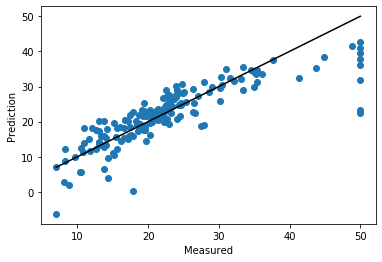

In [45]:
fig , ax = plt.subplots()
ax.scatter(y_test,y_test_pred)
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"k")
ax.set_xlabel("Measured")
ax.set_ylabel("Prediction")
plt.show()

# =======================================================

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
dataset= pd.read_csv("datas/Social_Network_Ads.csv")

In [50]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [54]:
x= dataset.iloc[:, [2,3]].values  # select col 2 and 3 and convert to array
y = dataset.iloc[:, 4].values

(array([[   19, 19000],
        [   35, 20000],
        [   26, 43000],
        [   27, 57000],
        [   19, 76000]], dtype=int64), array([0, 0, 0, 0, 0], dtype=int64))

### Training the data

In [60]:
from sklearn.model_selection import train_test_split  #sklearn.cross_validation is not working
x_train,s_test,y_trian , y_test =  train_test_split(x,y,test_size=0.25,random_state=0)


In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train =  sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [65]:
x_train[0:5,]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [68]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

C:\Users\krish\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [300, 339]

## Tensorflow

In [70]:
import tensorflow as tf


In [75]:
hello_constant = tf.Constant("hello")


AttributeError: module 'tensorflow' has no attribute 'Constant'

AttributeError: module 'tensorflow' has no attribute '__version__'